In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
city_df = pd.read_csv('city_day.csv')

In [3]:
city_df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,01-07-2020,37.63,NaN,4.42,35.04,20.17,NaN,0.28,14.40,9.69,1.73,47.05,1.87,119.0,Moderate
1,Aizawl,01-07-2020,4.49,5.39,11.44,0.07,15.11,19.41,0.02,2.07,3.39,NaN,NaN,NaN,20.0,Good
2,Amaravati,01-07-2020,22.00,34.00,1.50,9.68,6.40,8.45,0.59,10.88,29.15,0.10,0.50,NaN,54.0,Satisfactory
3,Amritsar,01-07-2020,57.67,100.99,32.81,15.11,30.20,17.73,0.59,3.48,16.48,1.30,1.10,8.82,78.0,Satisfactory
4,Bengaluru,01-07-2020,17.50,30.48,3.95,13.25,14.83,7.42,0.54,6.66,15.40,0.27,0.65,NaN,43.0,Good


In [4]:
city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [5]:
city_df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [6]:
city_df.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [16]:
without_city_date_df = city_df.copy()
without_city_date_df.drop(['City','Date','AQI_Bucket'], inplace=True, axis=1)
without_city_date_df[without_city_date_df.isna().all(axis=1)]

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df3 = without_city_date_df[without_city_date_df.isna().all(axis=1)]

In [24]:
lst = df3.index

In [25]:
lst

Int64Index([    6,    32,    58,    84,   110,   214,   240,   266,   292,
              318,
            ...
            27428, 27581, 27588, 27644, 29079, 29121, 29128, 29135, 29223,
            29244],
           dtype='int64', length=1374)

In [26]:
without_city_date_df.drop(index=lst, inplace=True)
without_city_date_df

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,37.63,NaN,4.42,35.04,20.17,NaN,0.28,14.40,9.69,1.73,47.05,1.87,119.0
1,4.49,5.39,11.44,0.07,15.11,19.41,0.02,2.07,3.39,NaN,NaN,NaN,20.0
2,22.00,34.00,1.50,9.68,6.40,8.45,0.59,10.88,29.15,0.10,0.50,NaN,54.0
3,57.67,100.99,32.81,15.11,30.20,17.73,0.59,3.48,16.48,1.30,1.10,8.82,78.0
4,17.50,30.48,3.95,13.25,14.83,7.42,0.54,6.66,15.40,0.27,0.65,NaN,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,NaN,NaN,3.26,17.33,10.88,20.36,0.33,3.54,10.73,0.56,4.64,NaN,NaN
29527,NaN,NaN,16.30,15.39,22.68,4.59,1.17,9.20,11.35,0.17,NaN,NaN,NaN
29528,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,9.84,472.0
29529,NaN,NaN,2.11,13.46,4.57,NaN,12.15,169.57,25.92,1.35,3.93,NaN,NaN


In [27]:
without_city_date_df.head(10)

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,37.63,NaN,4.42,35.04,20.17,NaN,0.28,14.40,9.69,1.73,47.05,1.87,119.0
1,4.49,5.39,11.44,0.07,15.11,19.41,0.02,2.07,3.39,NaN,NaN,NaN,20.0
2,22.00,34.00,1.50,9.68,6.40,8.45,0.59,10.88,29.15,0.10,0.50,NaN,54.0
3,57.67,100.99,32.81,15.11,30.20,17.73,0.59,3.48,16.48,1.30,1.10,8.82,78.0
4,17.50,30.48,3.95,13.25,14.83,7.42,0.54,6.66,15.40,0.27,0.65,NaN,43.0
5,14.00,30.00,1.10,5.12,3.62,8.05,0.35,12.45,48.77,NaN,NaN,NaN,69.0
7,32.90,72.38,0.56,9.87,5.92,36.63,0.33,14.91,34.33,3.31,0.33,0.46,66.0
8,15.95,4.85,6.22,10.72,16.44,33.52,1.02,9.23,48.37,0.09,0.00,NaN,92.0
9,NaN,NaN,NaN,46.03,27.57,NaN,0.57,5.73,10.59,0.00,0.00,NaN,NaN
10,54.01,128.66,6.33,21.05,16.81,29.06,0.97,11.15,29.73,2.03,23.57,0.65,101.0


In [28]:
city_df_copy = city_df.copy()
city_df_copy.drop(index=lst, inplace=True)
city_df_copy

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,01-07-2020,37.63,NaN,4.42,35.04,20.17,NaN,0.28,14.40,9.69,1.73,47.05,1.87,119.0,Moderate
1,Aizawl,01-07-2020,4.49,5.39,11.44,0.07,15.11,19.41,0.02,2.07,3.39,NaN,NaN,NaN,20.0,Good
2,Amaravati,01-07-2020,22.00,34.00,1.50,9.68,6.40,8.45,0.59,10.88,29.15,0.10,0.50,NaN,54.0,Satisfactory
3,Amritsar,01-07-2020,57.67,100.99,32.81,15.11,30.20,17.73,0.59,3.48,16.48,1.30,1.10,8.82,78.0,Satisfactory
4,Bengaluru,01-07-2020,17.50,30.48,3.95,13.25,14.83,7.42,0.54,6.66,15.40,0.27,0.65,NaN,43.0,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Bengaluru,01-01-2015,NaN,NaN,3.26,17.33,10.88,20.36,0.33,3.54,10.73,0.56,4.64,NaN,NaN,NaN
29527,Chennai,01-01-2015,NaN,NaN,16.30,15.39,22.68,4.59,1.17,9.20,11.35,0.17,NaN,NaN,NaN,NaN
29528,Delhi,01-01-2015,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,9.84,472.0,Severe
29529,Lucknow,01-01-2015,NaN,NaN,2.11,13.46,4.57,NaN,12.15,169.57,25.92,1.35,3.93,NaN,NaN,NaN


In [35]:
city_df_copy.isnull().sum().sort_values(ascending=False)

Xylene        16735
PM10           9766
NH3            8954
Toluene        6667
Benzene        4249
AQI            3307
AQI_Bucket     3307
PM2.5          3224
NOx            2811
O3             2648
SO2            2480
NO2            2211
NO             2208
CO              685
City              0
Date              0
dtype: int64

In [41]:
city_df_copy.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


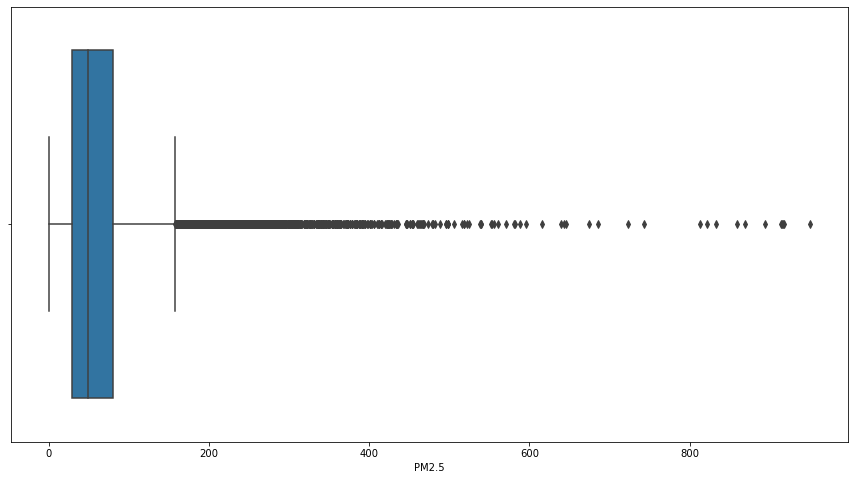

In [59]:
plt.figure(figsize=(15,8))
sns.boxplot(city_df_copy['PM2.5']);

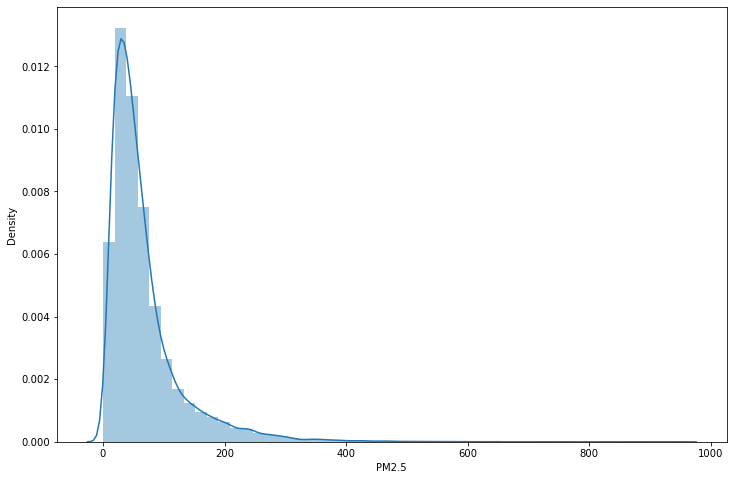

In [58]:
plt.figure(figsize=(12,8))
sns.distplot(city_df_copy['PM2.5']);

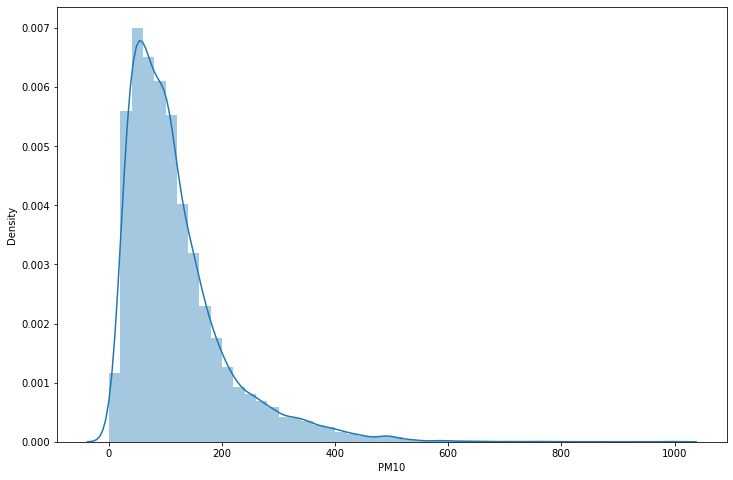

In [61]:
plt.figure(figsize=(12,8))
sns.distplot(city_df_copy['PM10']);

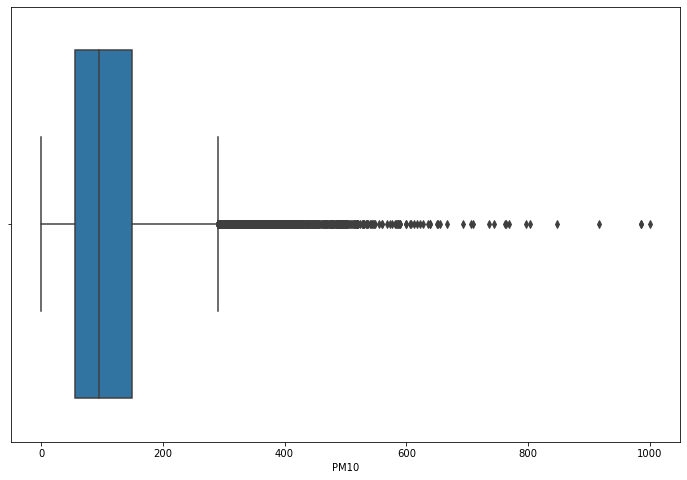

In [62]:
plt.figure(figsize=(12,8))
sns.boxplot(city_df_copy['PM10']);

In [91]:
def iqr(df):
    
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)

    iqr = q3 - q1

    lower_bound = round(q1 - (1.5 * iqr), 2)
    upper_bound = round(q3 + (1.5 * iqr), 2)
    res = lower_bound, upper_bound
    
    return res

In [92]:
iqr(city_df_copy['PM10'])

(-83.98, 289.98)

In [93]:
iqr(city_df_copy['PM2.5'])

(-48.84, 158.24)

In [97]:
for i in without_city_date_df.columns:
    print(i, iqr(without_city_date_df[i]))

PM2.5 (-48.84, 158.24)
PM10 (-83.98, 289.98)
NO (-15.85, 41.43)
NO2 (-27.05, 76.42)
NOx (-28.14, 81.09)
NH3 (-23.58, 62.18)
CO (-0.9, 2.86)
SO2 (-8.66, 29.54)
O3 (-21.2, 85.64)
Benzene (-4.32, 7.52)
Toluene (-12.23, 21.98)
Xylene (-4.68, 8.16)
AQI (-109.5, 398.5)
